# Exploratory Data Analysis(EDA)

## Semi cleaned Titanic Dataset

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [47]:
df=pd.read_csv("https://raw.githubusercontent.com/krishnaik06/EDA1/master/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## First Step of EDA
1.) To check whether are any missing values or not

In [48]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


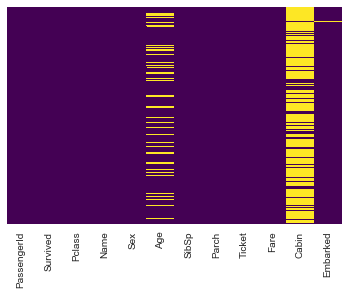

In [49]:
sb.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

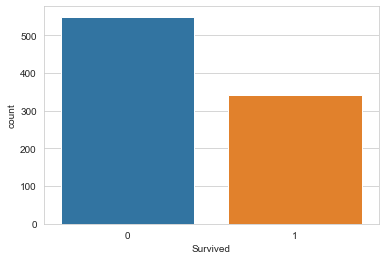

In [50]:
sb.set_style("whitegrid")
sb.countplot(x="Survived",data=df)

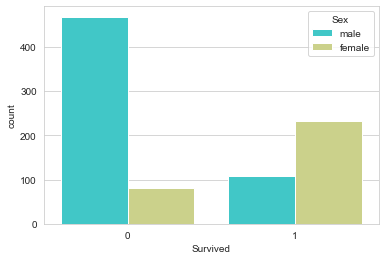

In [51]:
sb.countplot(x="Survived",data=df,hue="Sex",palette="rainbow")

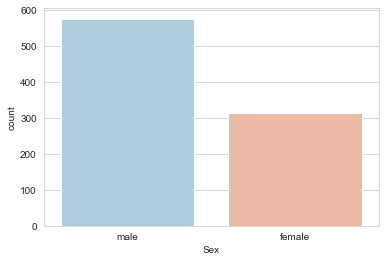

In [52]:
sb.countplot(x="Sex",data=df,palette="RdBu_r")

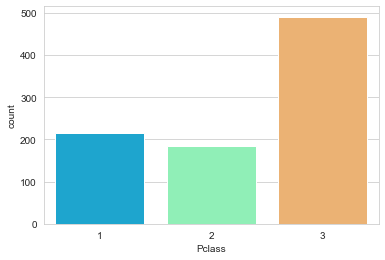

In [53]:
sb.countplot(x="Pclass",data=df,palette="rainbow")

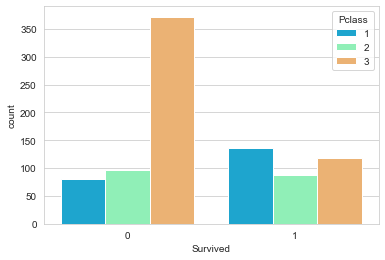

In [54]:
sb.countplot(x="Survived",hue="Pclass",data=df,palette="rainbow")

In [55]:
sb.set_style("whitegrid")

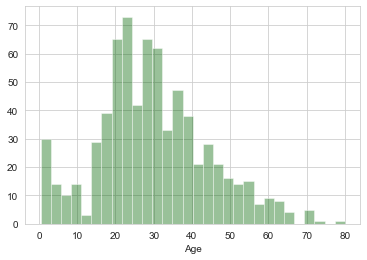

In [56]:
sb.distplot(df.Age.dropna(),kde=False,bins=30,color="darkgreen")

Text(0.5, 0, 'Age')

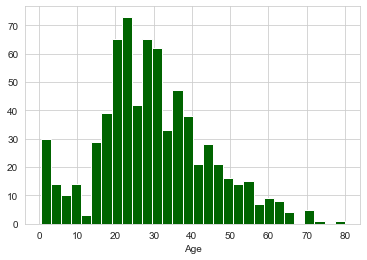

In [57]:
plt.hist(df["Age"].dropna(),color="darkgreen",bins=30)
plt.xlabel("Age")

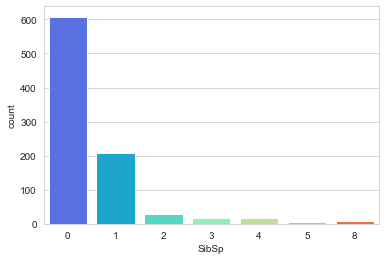

In [58]:
sb.countplot(x="SibSp",data=df,palette="rainbow")

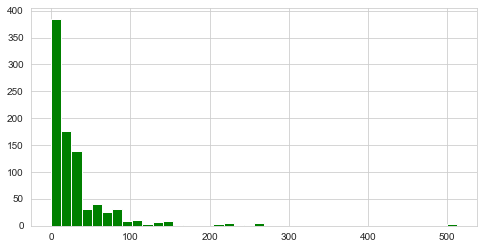

In [59]:
df["Fare"].hist(color="green",bins=40,figsize=(8,4))

# Data Cleaning

In [60]:
# As we have already noticed that our Age and Cabin columns has Null values ( missing values).Let's fill those values.

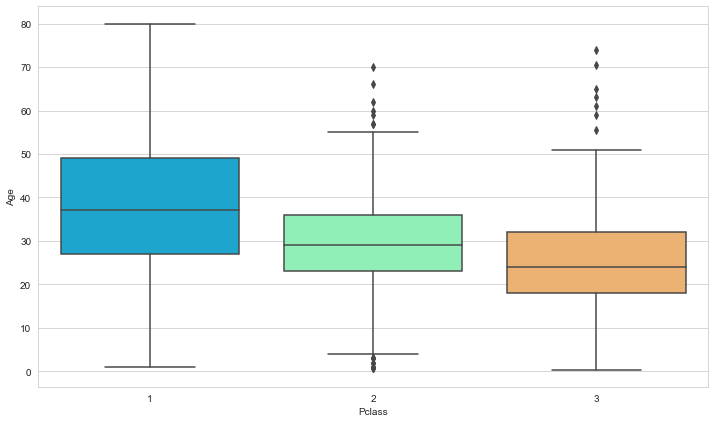

In [61]:
plt.figure(figsize=(12,7))
sb.boxplot(x="Pclass",y="Age",data=df,palette="rainbow")

In [62]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [63]:
df["Age"]=df[["Age","Pclass"]].apply(impute_age,axis=1)

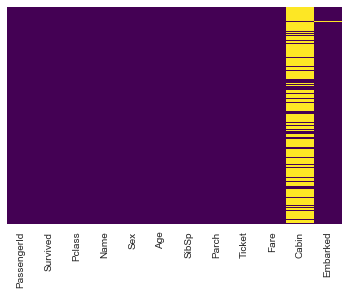

In [65]:
sb.heatmap(df.isnull(),yticklabels=False,cmap="viridis",cbar=False)

In [67]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [68]:
df.drop(["Cabin"],axis=1,inplace=True)

In [69]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


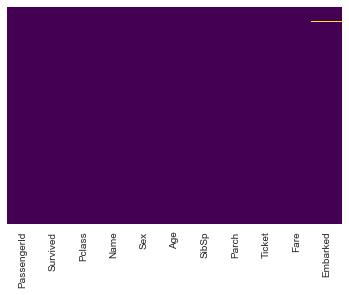

In [70]:
sb.heatmap(df.isnull(),cmap="viridis",cbar=False,yticklabels=False)

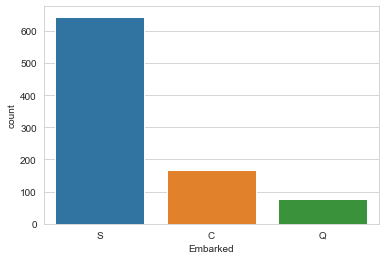

In [72]:
sb.countplot(x="Embarked",data=df)

In [75]:
df["Embarked"]=df["Embarked"].fillna("S")

In [76]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

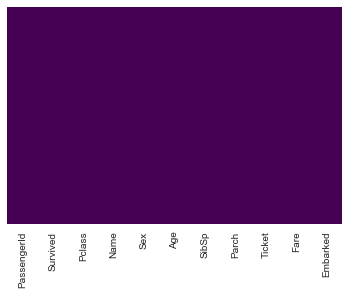

In [77]:
sb.heatmap(df.isnull(),cmap="viridis",cbar=False,yticklabels=False)

In [78]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [86]:
#performed 
#df.drop(["Name","Ticket"],axis=1,inplace=True)

In [85]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [87]:
df.drop(["PassengerId"],axis=1,inplace=True)

In [88]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Categorical Features

In [89]:
# Now we will handle how to deal with categorical variables

In [91]:
dummy=pd.get_dummies(df["Sex"],drop_first=True)
dummy

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [92]:
Embarked=pd.get_dummies(df["Embarked"],drop_first=True)

In [93]:
Embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [95]:
pd.concat([df,dummy,Embarked],axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1,0,1
887,1,1,female,19.0,0,0,30.0000,S,0,0,1
888,0,3,female,24.0,1,2,23.4500,S,0,0,1
889,1,1,male,26.0,0,0,30.0000,C,1,0,0


In [96]:
df.drop(["Sex","Embarked"],inplace=True,axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [97]:
# Now we have our dependen variable Survived and the remaining all are independent variables .So let's build our Logistic Model.

# Building Logistic Regression Model

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
model=LogisticRegression()

In [100]:
# Train Test Split the Data set 

In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(["Survived"],axis=True),df["Survived"],test_size=0.25)

In [102]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
predicted=model.predict(x_test)

In [105]:
model.score(x_test,y_test)

0.7219730941704036

In [106]:
from sklearn.metrics import confusion_matrix

In [109]:
cm=confusion_matrix(y_test,predicted)

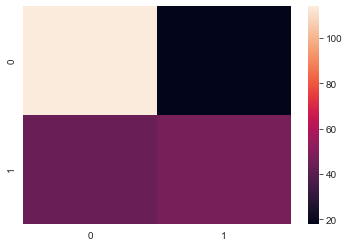

In [112]:
sb.heatmap(cm)